In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
from torchsummary import summary
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\data\Student_performance_data _.csv")
df.sample(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
332,1333,18,0,0,2,12.133786,2,0,0,0,0,0,0,2.780817,2.0
1682,2683,15,1,1,2,11.485871,1,0,2,0,1,0,0,3.121119,1.0
820,1821,17,1,0,0,4.190384,17,0,1,0,0,1,0,1.482596,4.0
2284,3285,16,0,0,1,13.673991,14,0,1,1,0,0,0,1.699825,0.0


In [3]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [4]:
#split dataset

#convert numpy arrays
X = df.drop(columns=['Tutoring', 'StudentID']).values
y = df['Tutoring'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print('X_train shape is : {}'.format(X_train.shape),'\n')
print('X_test  shape is : {}'.format(X_test.shape),'\n')
print('y_train shape is : {}'.format(y_train.shape),'\n')
print('y_test  shape is : {}'.format(y_test.shape),'\n')

X_train shape is : (1913, 13) 

X_test  shape is : (479, 13) 

y_train shape is : (1913,) 

y_test  shape is : (479,) 



In [5]:
type(X_train)

numpy.ndarray

In [6]:
data_loader = DataLoader(dataset = list(zip(X_train, y_train)),batch_size = 16, shuffle = True)
data, labels = next(iter(data_loader))

print("The shape of singular batch size of training : {}".format(data.size()))
print("The shape of singular batch size of testing  : {}".format(labels.size()))
     

The shape of singular batch size of training : torch.Size([16, 13])
The shape of singular batch size of testing  : torch.Size([16])


In [7]:
###ANN building

class StudentClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #create 1st hidden layer
        self.hidden_layer_1 = nn.Linear(in_features=13, out_features=128, bias=True)
        self.activation_1 = nn.ReLU()
        #create 2nd hidden layer
        self.hidden_layer_2 = nn.Linear(in_features=128, out_features=64, bias=True)
        self.activation_2 = nn.ReLU()
        #create output layer
        self.output_layer = nn.Linear(in_features=64, out_features=1, bias=True)
        self.activation_output = nn.Sigmoid()
        
    def forward(self, x):
        #activation(W^T + B); x = training dataset
        X = self.hidden_layer_1(x)
        X = self.activation_1(X)
        X = self.hidden_layer_2(X)
        X = self.activation_2(X)
        X = self.output_layer(X)
        X = self.activation_output(X)
        
        return X
    
    
model = StudentClassifier()
print(model, '\n\n\n')
print(model.parameters)

StudentClassifier(
  (hidden_layer_1): Linear(in_features=13, out_features=128, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=128, out_features=64, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (activation_output): Sigmoid()
) 



<bound method Module.parameters of StudentClassifier(
  (hidden_layer_1): Linear(in_features=13, out_features=128, bias=True)
  (activation_1): ReLU()
  (hidden_layer_2): Linear(in_features=128, out_features=64, bias=True)
  (activation_2): ReLU()
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
  (activation_output): Sigmoid()
)>


In [8]:
print(model.parameters(),'\n\n\n')
summary(model, X_train.shape)

<generator object Module.parameters at 0x000002C835600660> 



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1913, 128]           1,792
              ReLU-2            [-1, 1913, 128]               0
            Linear-3             [-1, 1913, 64]           8,256
              ReLU-4             [-1, 1913, 64]               0
            Linear-5              [-1, 1913, 1]              65
           Sigmoid-6              [-1, 1913, 1]               0
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.09
Forward/backward pass size (MB): 5.63
Params size (MB): 0.04
Estimated Total Size (MB): 5.77
----------------------------------------------------------------


In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
#training
dtype = torch.float32 #making same dtype for X, y
epochs = 64
Loss = []
model.train()
for epoch in range(epochs):
    #Call data_loader so that we can pass the X_train data to the model with batch_size
    for X_batch, y_batch in data_loader:
        X_batch = X_batch.to(dtype=dtype)
        y_batch = y_batch.to(dtype=dtype)
        #pass X_batch to the model
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch.reshape(-1,1))
        Loss.append(loss)
        #Initialize the Gradient
        optimizer.zero_grad()
        #calculating loss, then do back propagation
        loss.backward()
        optimizer.step()
    print('Epoch {}, Loss {}'.format(epoch, loss))

Epoch 0, Loss 0.012374591082334518
Epoch 1, Loss 0.04443434998393059
Epoch 2, Loss 0.11617643386125565
Epoch 3, Loss 0.18167608976364136
Epoch 4, Loss 0.24897480010986328
Epoch 5, Loss 0.26619279384613037
Epoch 6, Loss 0.20357383787631989
Epoch 7, Loss 0.40752312541007996
Epoch 8, Loss 0.07117115706205368
Epoch 9, Loss 0.26000943779945374
Epoch 10, Loss 0.5083851218223572
Epoch 11, Loss 0.18069492280483246
Epoch 12, Loss 0.05300251394510269
Epoch 13, Loss 0.18163108825683594
Epoch 14, Loss 0.23095332086086273
Epoch 15, Loss 0.1572723686695099
Epoch 16, Loss 0.1020374447107315
Epoch 17, Loss 0.12226007878780365
Epoch 18, Loss 0.2019486278295517
Epoch 19, Loss 0.18847888708114624
Epoch 20, Loss 0.22682523727416992
Epoch 21, Loss 0.14002221822738647
Epoch 22, Loss 0.07797139883041382
Epoch 23, Loss 0.028302202001214027
Epoch 24, Loss 0.15405753254890442
Epoch 25, Loss 0.28727033734321594
Epoch 26, Loss 0.14662325382232666
Epoch 27, Loss 0.12586259841918945
Epoch 28, Loss 0.172872737050056

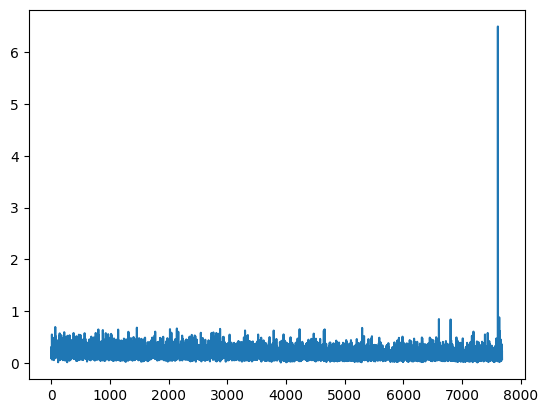

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(Loss)

In [28]:
X_test_tensor = torch.from_numpy(X_test).float()  # Convert to tensor and ensure it's of type float32
predicted = model(X_test_tensor)

In [29]:
y_pred = torch.where(predicted.flatten() > 0.5, 1, 0)

In [31]:
print("The accuracy score is  : ", accuracy_score(y_pred, y_test))
print("The precision score is : ", precision_score(y_pred, y_test))
print("The recall score is    : ", recall_score(y_pred, y_test))
print("The f1 score of ths is : ", f1_score(y_pred, y_test))

The accuracy score is  :  0.6951983298538622
The precision score is :  0.5594405594405595
The recall score is    :  0.49079754601226994
The f1 score of ths is :  0.5228758169934641


### rather than accuracy score I try to show the architecture of ANN with pytorch

# Thanks